In [1]:
import sys
sys.path.append('/home/raghav/sunbather/src/') #add your path to /sunbather/src/ here

import tools
import RT
import construct_parker as cp
import convergeT_parker as cT
import os

from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
from scipy.integrate import cumulative_trapezoid
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from p_winds import parker as pw_parker

/home/raghav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/raghav/.local/lib/python3.10/site-packages/p_winds/tools.py:24: UserWarning: Environment variable PWINDS_REFSPEC_DIR is not set.
  warn("Environment variable PWINDS_REFSPEC_DIR is not set.")


**Running Necessary Simulations**

In [2]:
hj = tools.Planet("hotJupiter")
T = 7000
Mdot = 11.0
pdir = 'solar'
solar_ab = tools.Abundances()

In [3]:
cp.save_cloudy_parker_profile(hj,Mdot,T,solar_ab,pdir,overwrite=False)
cT.run_s('hotJupiter',Mdot,T,1,1.1,'solar','real',overwrite=False,startT='nearby',pdir=pdir,abundances=solar_ab,save_sp=tools.get_specieslist())

Parker profile already exists and overwrite = False: hotJupiter solar 11.000 7000
Simulation already exists and overwrite = False: hotJupiter solar 11.000 7000


In [4]:
pdir = 'metalfrac'
metalfrac_ab = tools.Abundances()
metalfrac_ab.set_fractionationprofile(elements='all', exclude_elements=['H', 'He'], proftype='strline', vals=0.1 , frac_intervals=[1.2, 3.0], fraction=True) 

In [5]:
cp.save_cloudy_parker_profile(hj,Mdot,T,metalfrac_ab,pdir,overwrite=False)
cT.run_s('hotJupiter',Mdot,T,1,1.1,'metalfrac','real',overwrite=False,startT='nearby',pdir=pdir,abundances=metalfrac_ab,save_sp=tools.get_specieslist())

Parker profile already exists and overwrite = False: hotJupiter metalfrac 11.000 7000
Simulation already exists and overwrite = False: hotJupiter metalfrac 11.000 7000


In [6]:
pdir = 'metalfrac_2Rp'
metalfrac2Rp_ab = tools.Abundances()
metalfrac2Rp_ab.set_fractionationprofile(elements='all', exclude_elements=['H', 'He'], proftype='strline', vals=0.1 , frac_intervals=[1.0, 2.0], fraction=True) 

In [7]:
cp.save_cloudy_parker_profile(hj,Mdot,T,metalfrac2Rp_ab,pdir,overwrite=False)
cT.run_s('hotJupiter',Mdot,T,1,1.1,'metalfrac_2Rp','real',overwrite=False,startT='nearby',pdir=pdir,abundances=metalfrac2Rp_ab,save_sp=tools.get_specieslist())

Parker profile already exists and overwrite = False: hotJupiter metalfrac_2Rp 11.000 7000
Simulation already exists and overwrite = False: hotJupiter metalfrac_2Rp 11.000 7000


In [8]:
pdir = 'z0.3'
z0point3_ab = tools.Abundances()
z0point3_ab.set_metallicity(0.3)

In [9]:
cp.save_cloudy_parker_profile(hj,Mdot,T,z0point3_ab,pdir,overwrite=False)
cT.run_s('hotJupiter',Mdot,T,1,1.1,'z0.3','real',overwrite=False,startT='nearby',pdir=pdir,abundances=z0point3_ab,save_sp=tools.get_specieslist())

Parker profile already exists and overwrite = False: hotJupiter z0.3 11.000 7000
Simulation already exists and overwrite = False: hotJupiter z0.3 11.000 7000


In [10]:
pdir = 'z0.6'
z0point6_ab = tools.Abundances()
z0point6_ab.set_metallicity(0.6)


In [11]:
cp.save_cloudy_parker_profile(hj,Mdot,T,z0point6_ab,pdir,overwrite=False)
cT.run_s('hotJupiter',Mdot,T,1,1.1,'z0.6','real',overwrite=False,startT='nearby',pdir=pdir,abundances=metalfrac2Rp_ab,save_sp=tools.get_specieslist())

Parker profile already exists and overwrite = False: hotJupiter z0.6 11.000 7000
Simulation already exists and overwrite = False: hotJupiter z0.6 11.000 7000


**Calculating and plotting transit depth ratios**

In [12]:
def calc_depthratio(spec1,spec2):

    normspec1 = spec1 / spec1[0]
    normspec2 = spec2 / spec2[0]

    return np.min(normspec2) / np.min(normspec1)

In [13]:
def get_line_ratios(sim_list, wavs_list, species_list):

    ratios_list = [[] for _ in range(len(sim_list))] #Each list in this has the line ratios for a simulation
    ts_list = [[] for _ in range(len(sim_list))] #Each list in this has the transit spectra for a simulation
    #Assuming reference spectrum is first one
    for i in range(len(wavs_list)):
        for j in range(len(sim_list)):
            ts, _, _ = RT.FinFout(sim_list[j], wavs_list[i], species_list[i], width_fac=20.)
            ts_list[j].append(ts)

    ref_spectra = ts_list[0]
    for i in range(len(wavs_list)):
        for j in range(len(sim_list)):
            depth_ratio = calc_depthratio(ts_list[j][i], ref_spectra[i])
            ratios_list[j].append(depth_ratio)
        
    return ratios_list

In [14]:
z1 = tools.Sim("/home/raghav/project_sb/sims/1D/hotJupiter/solar/parker_7000_11.000/converged")
metalfrac_1point2_3Rp = tools.Sim("/home/raghav/project_sb/sims/1D/hotJupiter/metalfrac/parker_7000_11.000/converged")
metalfrac_2Rp = tools.Sim("/home/raghav/project_sb/sims/1D/hotJupiter/metalfrac_2Rp/parker_7000_11.000/converged")
z0point3 = tools.Sim("/home/raghav/project_sb/sims/1D/hotJupiter/z0.3/parker_7000_11.000/converged")
z0point6 = tools.Sim("/home/raghav/project_sb/sims/1D/hotJupiter/z0.6/parker_7000_11.000/converged")
z0point58 = tools.Sim("/home/raghav/project_sb/sims/1D/hotJupiter/z0.23/parker_7000_11.000/converged")

In [15]:
wavs_N_1 = RT.constantR_wavs(1133, 1136, 100000) #1135
wavs_N_2 = RT.constantR_wavs(1198, 1202, 100000) #1199.5
wavs_N_3 = RT.constantR_wavs(1492, 1496, 100000) #1492.6
wavs_N2_1 = RT.constantR_wavs(1083, 1087, 100000) #1085.7
wavs_N3_1 = RT.constantR_wavs(989, 993, 100000) #991.6
wavs_N5_1 = RT.constantR_wavs(1238, 1241, 100000) #1238.8

In [16]:
sims_list = [z1, metalfrac_1point2_3Rp, metalfrac_2Rp, z0point3, z0point6]
wavs_list = [wavs_N_1, wavs_N_2, wavs_N_3, wavs_N2_1, wavs_N3_1, wavs_N5_1]
species_list = ['N', 'N', 'N', 'N+', 'N+2', 'N+4']

In [17]:
N_lineratios_highres = get_line_ratios(sims_list, wavs_list, species_list)

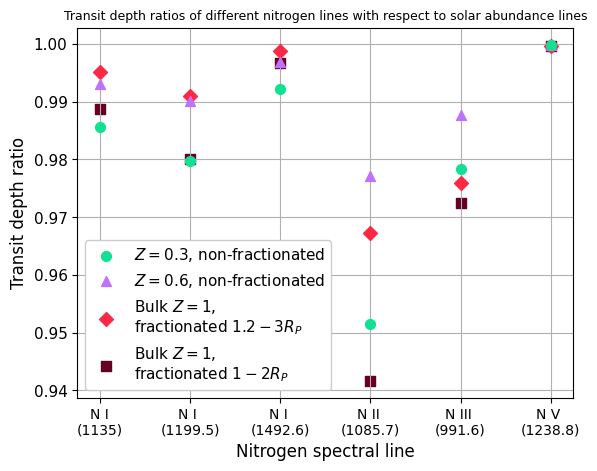

In [18]:
x_ax = np.arange(1, len(species_list)+1, 1)
fig, ax = plt.subplots(1)
ax.scatter(x_ax, N_lineratios_highres[3], color='xkcd:aqua green', marker='o', zorder=4, s=50, label='$Z=0.3$, non-fractionated')
ax.scatter(x_ax, N_lineratios_highres[4], color='xkcd:easter purple', marker='^', zorder=3, s=50, label='$Z=0.6$, non-fractionated')
ax.scatter(x_ax, N_lineratios_highres[1], color='xkcd:strawberry', marker='D',zorder=2, s=50, label='Bulk $Z=1$, \nfractionated $1.2-3R_P$')
ax.scatter(x_ax, N_lineratios_highres[2], color='xkcd:maroon', marker='s', zorder=1, s=50, label='Bulk $Z=1$, \nfractionated $1-2R_P$')
ax.set_xticks(x_ax)
ax.set_xticklabels(['N I\n(1135)', 'N I \n(1199.5)', 'N I \n(1492.6)', 'N II \n(1085.7)', 'N III \n(991.6)', 'N V \n(1238.8)'], fontsize=10)
ax.set_ylabel('Transit depth ratio', size=12)
ax.set_xlabel('Nitrogen spectral line', size=12)
plt.yticks(size=11)
font = {'size':9}
plt.title('Transit depth ratios of different nitrogen lines with respect to solar abundance lines', fontdict=font)
plt.grid(True)
plt.legend(prop={'size':11},facecolor=(1,1,1,1),framealpha=1, loc='lower left')
#plt.savefig('Example_NitrogenTDRs.png', dpi=400, bbox_inches='tight')
plt.show()